In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
usdInr = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\USDINR\USDINR.csv')
usdInr.drop('Unnamed: 0', axis=1, inplace=True)
usdInr.head()

,Date,Open_price,Day_high,Day_low,Closing_price,Currency Pair,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,2014-11-07,61.390,61.620,61.340,61.400,USD/INR,61.610101,61.341917,61.393506,61.400000,61.400000,61.400000,0.0,0.000000,0.000000,0.000000,61.7496,62.164424,61.334776
1,2014-11-10,61.500,61.635,61.340,61.495,USD/INR,61.627339,61.332157,61.493596,61.403725,61.401881,61.400945,0.0,0.007578,0.001516,0.006063,61.7496,62.164424,61.334776
2,2014-11-11,61.530,61.555,61.505,61.508,USD/INR,61.547724,61.499491,61.516284,61.407815,61.403983,61.402010,0.0,0.014466,0.004106,0.010361,61.7496,62.164424,61.334776
3,2014-11-12,61.508,61.560,61.350,61.391,USD/INR,61.567341,61.356586,61.504031,61.407155,61.403725,61.401901,0.0,0.010365,0.005358,0.005007,61.7496,62.164424,61.334776
4,2014-11-13,61.368,61.623,61.350,61.565,USD/INR,61.633775,61.348468,61.385332,61.413345,61.406919,61.403524,0.0,0.020914,0.008469,0.012445,61.7496,62.164424,61.334776


In [3]:
X = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\USDINR\X_USDINR.csv')
X.drop('Unnamed: 0', axis=1, inplace=True)
X.head()

,Deseasonalized_Day_high,Deseasonalized_Day_low,Deseasonalized_Open_price,EMA_50,EMA_100,EMA_200,RSI,MACD,Signal_Line,MACD_Histogram,SMA,Upper Band,Lower Band
0,0.002716,0.004312,0.002460,0.000000,0.000000,0.000000,0.0,0.435743,0.428316,0.501290,0.001107,0.000439,0.029707
1,0.003467,0.003890,0.006787,0.000164,0.000083,0.000042,0.0,0.440006,0.429330,0.511641,0.001107,0.000439,0.029707
2,0.000000,0.011124,0.007768,0.000344,0.000177,0.000090,0.0,0.443880,0.431063,0.518980,0.001107,0.000439,0.029707
3,0.000854,0.004946,0.007238,0.000315,0.000165,0.000085,0.0,0.441573,0.431901,0.509839,0.001107,0.000439,0.029707
4,0.003747,0.004596,0.002107,0.000587,0.000307,0.000158,0.0,0.447507,0.433982,0.522539,0.001107,0.000439,0.029707


In [4]:
y = pd.read_csv(r'C:\Users\Sejal Hanmante\OneDrive\Documents\GitHub\ForEx\USDINR\Y_USDINR.csv')
y.drop('Unnamed: 0', axis=1, inplace=True)
y.head()

,Closing_price
0,61.400
1,61.495
2,61.508
3,61.391
4,61.565


Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0585 - mae: 0.1575 - val_loss: 9.8202e-04 - val_mae: 0.0249
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mae: 0.0449 - val_loss: 7.7573e-04 - val_mae: 0.0219
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mae: 0.0413 - val_loss: 6.1210e-04 - val_mae: 0.0195
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - mae: 0.0375 - val_loss: 5.1477e-04 - val_mae: 0.0172
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 5.0789e-04 - val_mae: 0.0171
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - mae: 0.0323 - val_loss: 4.3221e-04 - val_mae: 0.0156
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0300 - val_loss: 4.1987e-04 - val_mae: 0.0154
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 3.9347e-04 - val_mae: 0.0147
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

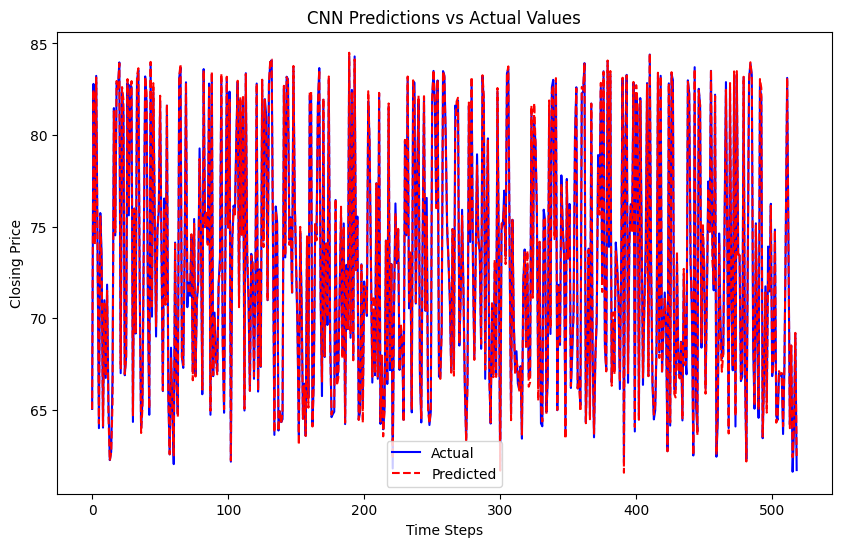

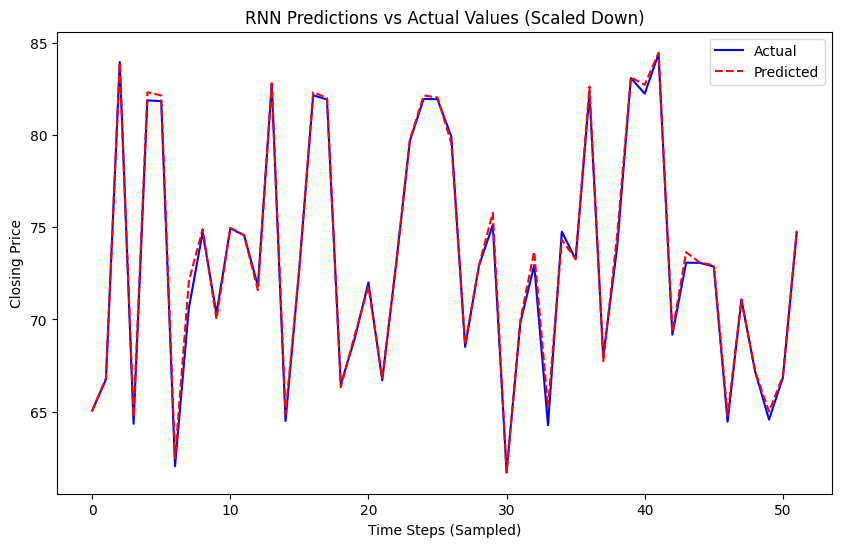

In [9]:
def cnn_model(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
        MaxPooling1D(2),
        Dropout(0.2),  # Regularization
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate the model
    train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
    test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_cnn = cnn_model.predict(X_test)
    y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_cnn_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_cnn_rescaled)

    cnn_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("CNN Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    # Example of selecting a smaller range of data for clarity:
    sampled_indices = range(0, len(y_test_rescaled), 10)  # Down-sample data to every 10th point
    y_test_sampled = [y_test_rescaled[i] for i in sampled_indices]
    y_pred_sampled = [y_pred_cnn_rescaled[i] for i in sampled_indices]

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_sampled, label="Actual", color="blue")
    plt.plot(y_pred_sampled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("RNN Predictions vs Actual Values (Scaled Down)")
    plt.xlabel("Time Steps (Sampled)")
    plt.ylabel("Closing Price")
    plt.show()

    return cnn_df

cnn_metrics_df = cnn_model(usdInr)

In [6]:
X.columns

Index(['Deseasonalized_Day_high', 'Deseasonalized_Day_low',
       'Deseasonalized_Open_price', 'EMA_50', 'EMA_100', 'EMA_200', 'RSI',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'SMA', 'Upper Band',
       'Lower Band'],
      dtype='object')

Epoch 1/20


C:\Users\Sejal Hanmante\AppData\Local\Temp\ipykernel_3060\2731186356.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop("RSI",axis=1 , inplace=True)
d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0635 - mae: 0.1363 - val_loss: 0.0016 - val_mae: 0.0310
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - mae: 0.0493 - val_loss: 0.0012 - val_mae: 0.0266
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - mae: 0.0451 - val_loss: 0.0011 - val_mae: 0.0243
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0013 - val_mae: 0.0275
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0025 - mae: 0.0383 - val_loss: 9.2176e-04 - val_mae: 0.0226
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023 - mae: 0.0362 - val_loss: 8.5546e-04 - val_mae: 0.0214
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0351 - val_loss: 0.0015 - val_mae: 0.0313
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - mae: 0.0341 - val_loss: 8.2041e-04 - val_mae: 0.0219
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - mae:

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9525e-04 - mae: 0.0164
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9271e-04 - mae: 0.0160
Train Loss: 0.0005, Train MAE: 0.0160
Test Loss: 0.0005, Test MAE: 0.0160
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


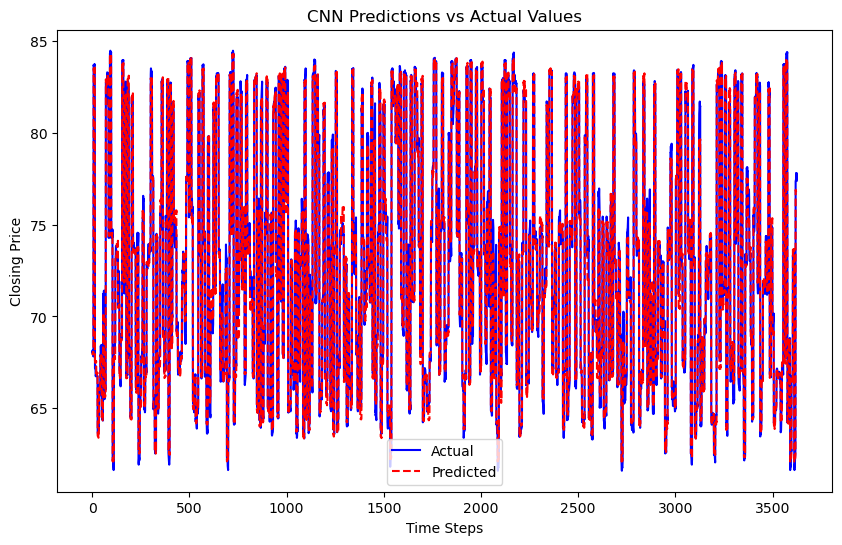

  Metric     Value
0    MAE  0.370444
1    MSE  0.262849
2   MAPE  0.005148
3     R2  0.994246


In [7]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

def cnn_model(usdInr):
    # Define target and features
    target = 'Closing_price'
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    X.drop("RSI",axis=1 , inplace=True)
    y = usdInr[target].values
    X = X.select_dtypes('number').values  # Ensure only numeric columns

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Save scalers using joblib
    joblib.dump(scaler_X, "usd_inr_scaler_X")
    joblib.dump(scaler_y, "usd_inr_scaler_y")

    def create_sequences(X, y, sequence_length, forecast_horizon=7):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length - forecast_horizon + 1):  
            X_seq.append(X[i:i + sequence_length])  
            y_seq.append(y[i + sequence_length : i + sequence_length + forecast_horizon])  # Next 7 values
        return np.array(X_seq), np.array(y_seq)


    sequence_length =30
# Create sequences
    X_seq, y_seq = create_sequences(X,y,sequence_length = 30,forecast_horizon=7)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build CNN model
    cnn_model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2])),
        MaxPooling1D(2),
        Dropout(0.2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(7)
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Save trained model
    cnn_model.save("usd_inr_cnn.h5")

    # Evaluate the model
    train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
    test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_cnn = cnn_model.predict(X_test)
    y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

    # Rescale actual test data
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    # Compute metrics
    mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_cnn_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_cnn_rescaled)

    cnn_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("CNN Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    return cnn_df

# Train and save the model
cnn_metrics_df = cnn_model(usdInr)
print(cnn_metrics_df)






With Regularization

Epoch 1/20


C:\Users\uzmap\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7904 - mae: 0.2006 - val_loss: 0.3474 - val_mae: 0.0265
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3110 - mae: 0.0562 - val_loss: 0.2221 - val_mae: 0.0252
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2067 - mae: 0.0441 - val_loss: 0.1598 - val_mae: 0.0272
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1499 - mae: 0.0402 - val_loss: 0.1179 - val_mae: 0.0220
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1111 - mae: 0.0354 - val_loss: 0.0879 - val_mae: 0.0199
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 - mae: 0.0315 - val_loss: 0.0658 - val_mae: 0.0189
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0623 - mae: 0.0309 - val_loss: 0.0494 - val_mae: 0.0201
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0467 - mae: 0.0279 - val_loss: 0.0370 - val_mae: 0.0172
Epoch 9/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 - mae: 0.0283 - va

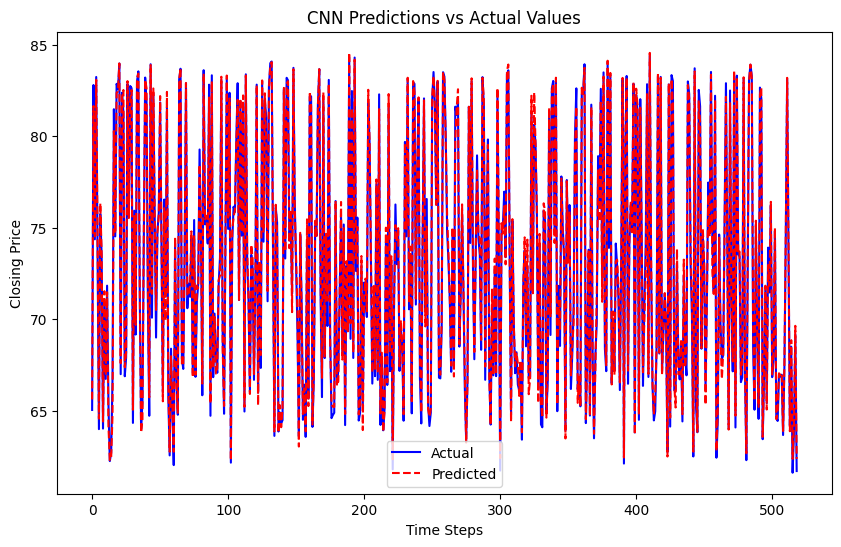

In [12]:
from keras import regularizers
from keras.callbacks import EarlyStopping

def cnn_model_with_regularization(usdInr):
    # Define features (X) and target (y)
    target = 'Closing_price'  # Change to your target column
    features = [col for col in usdInr.columns if col not in ['Date', target]]

    # Separate X and y
    X = usdInr[features]
    y = usdInr[target].values
    X = X.select_dtypes('number').values

    # Normalize X and y
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

    # Create sequences
    sequence_length = 30

    def create_sequences(X, y, sequence_length):
        X_seq, y_seq = [], []
        for i in range(len(X) - sequence_length):
            X_seq.append(X[i:i + sequence_length])
            y_seq.append(y[i + sequence_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X, y, sequence_length)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

    # Build CNN model with L2 regularization and Early Stopping
    cnn_model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=(sequence_length, X_train.shape[2]),
               kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization with lambda 0.01
        MaxPooling1D(2),
        Dropout(0.2),  # Regularization
        Flatten(),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model with early stopping
    cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Evaluate the model
    train_loss, train_mae = cnn_model.evaluate(X_train, y_train)
    test_loss, test_mae = cnn_model.evaluate(X_test, y_test)

    print(f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

    # Make predictions
    y_pred_cnn = cnn_model.predict(X_test)
    y_pred_cnn_rescaled = scaler_y.inverse_transform(y_pred_cnn.reshape(-1, 1))

    # Rescale actual test data for comparison
    y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

    mae = mean_absolute_error(y_test_rescaled, y_pred_cnn_rescaled)
    mse = mean_squared_error(y_test_rescaled, y_pred_cnn_rescaled)
    mape = mean_absolute_percentage_error(y_test_rescaled, y_pred_cnn_rescaled)
    r2 = r2_score(y_test_rescaled, y_pred_cnn_rescaled)

    cnn_df = pd.DataFrame({
        "Metric": ["MAE", "MSE", "MAPE", "R2"],
        "Value": [mae, mse, mape, r2]
    })

    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_rescaled, label="Actual", color="blue")
    plt.plot(y_pred_cnn_rescaled, label="Predicted", color="red", linestyle="--")
    plt.legend()
    plt.title("CNN Predictions vs Actual Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Closing Price")
    plt.show()

    return cnn_df

# Example call to the function
cnn_metrics_withRegularization_df = cnn_model_with_regularization(usdInr)

In [14]:
cnn_metrics_df

,Metric,Value
0,MAE,0.443252
1,MSE,0.345662
2,MAPE,0.006117
3,R2,0.992392


In [13]:
cnn_metrics_withRegularization_df

,Metric,Value
0,MAE,0.433936
1,MSE,0.318769
2,MAPE,0.006062
3,R2,0.992984
